In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [2]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

Using TensorFlow backend.


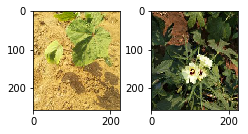

In [4]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = 'C:/Users/Ashwin Ram/dataset/dsNew'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
for i, img_path in enumerate(random.sample(img_list, 2)):
    img = image.load_img(img_path, target_size=(256, 224))
    img = image.img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    
    plt.imshow(img.squeeze())

In [5]:
train_datagen = ImageDataGenerator(
    brightness_range=[0.75,1.25],
    rescale=1./255,
    zoom_range=0.1,
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1,
    fill_mode='nearest',
    
    shear_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    #classes=['crop','weed'],
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    #classes=['crop','weed'],
    subset='validation',
    seed=0
)

Found 318 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [6]:
# train_datagen = ImageDataGenerator(rescale = 1/255,horizontal_flip=True,vertical_flip=True,)
# test_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.1
# )
# train_generator = datagen.flow_from_directory(directory=base_path, target_size=(224,224),  classes=['crop','weed'], class_mode='binary',  batch_size=16)

# validation_generator = datagen.flow_from_directory(directory=valid_data_dir,target_size=(img_width,img_height),classes=['crop','weed'],class_mode='binary',batch_size=16)

In [7]:
# model = Sequential()
# #add model layers
# model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(224,224,3)))
# model.add(Conv2D(32, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(3,3))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(1, activation='softmax'))

In [8]:

model =Sequential()

model.add(Conv2D(32,(3,3), input_shape=(224, 224, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), input_shape=(224, 224, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), input_shape=(224, 224, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=(224, 224, 3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
# asdf = [1,5,7,8,9]
# np.random.seed(0)
# np.random.shuffle(asdf)
# print(asdf)
# ksdf = [1,5,7,8,9]
# np.random.seed(0)
# np.random.shuffle(ksdf)
# print(ksdf)

In [13]:
import tensorflow as tf
# your code here
with tf.device('/gpu:1'):
    batch_size = 32
    epochs = 100
    steps_per_epoch = train_generator.n // batch_size
    validation_steps = validation_generator.n // batch_size
    #print(steps_per_epoch,validation_steps)
    history = model.fit_generator(train_generator, 
                                  steps_per_epoch = steps_per_epoch,
                                  epochs=100,
                                  workers=4,
                                  validation_data=validation_generator, 
                                  validation_steps=validation_steps)

Epoch 1/100
20/20 [==============================] - 9s 431ms/step - loss: 0.4462 - acc: 0.8239 - val_loss: 0.7308 - val_acc: 0.7059
Epoch 2/100
20/20 [==============================] - 10s 506ms/step - loss: 0.4088 - acc: 0.8428 - val_loss: 1.5013 - val_acc: 0.5294
Epoch 3/100
20/20 [==============================] - 10s 477ms/step - loss: 0.4463 - acc: 0.8113 - val_loss: 0.4182 - val_acc: 0.8529
Epoch 4/100
20/20 [==============================] - 10s 480ms/step - loss: 0.3981 - acc: 0.8270 - val_loss: 0.4370 - val_acc: 0.8235
Epoch 5/100
20/20 [==============================] - 9s 465ms/step - loss: 0.3860 - acc: 0.8459 - val_loss: 0.4417 - val_acc: 0.7059
Epoch 6/100
20/20 [==============================] - 9s 460ms/step - loss: 0.4095 - acc: 0.8270 - val_loss: 0.7070 - val_acc: 0.8529
Epoch 7/100
20/20 [==============================] - 11s 537ms/step - loss: 0.3870 - acc: 0.8428 - val_loss: 1.0144 - val_acc: 0.6765
Epoch 8/100
20/20 [==============================] - 9s 459ms/ste

Epoch 39/100
20/20 [==============================] - 3s 164ms/step - loss: 0.3648 - acc: 0.8491 - val_loss: 0.5544 - val_acc: 0.8235
Epoch 40/100
20/20 [==============================] - 4s 177ms/step - loss: 0.3482 - acc: 0.8679 - val_loss: 0.6935 - val_acc: 0.8529
Epoch 41/100
20/20 [==============================] - 3s 175ms/step - loss: 0.3422 - acc: 0.8648 - val_loss: 0.8568 - val_acc: 0.7941
Epoch 42/100
20/20 [==============================] - 3s 171ms/step - loss: 0.3279 - acc: 0.8805 - val_loss: 0.7733 - val_acc: 0.8529
Epoch 43/100
20/20 [==============================] - 4s 177ms/step - loss: 0.3745 - acc: 0.8491 - val_loss: 0.6239 - val_acc: 0.8529
Epoch 44/100
20/20 [==============================] - 4s 184ms/step - loss: 0.3584 - acc: 0.8711 - val_loss: 0.5561 - val_acc: 0.8529
Epoch 45/100
20/20 [==============================] - 4s 175ms/step - loss: 0.3167 - acc: 0.8774 - val_loss: 0.5951 - val_acc: 0.8235
Epoch 46/100
20/20 [==============================] - 4s 175ms

Epoch 77/100
20/20 [==============================] - 4s 213ms/step - loss: 0.3165 - acc: 0.8774 - val_loss: 0.8715 - val_acc: 0.8824
Epoch 78/100
20/20 [==============================] - 4s 204ms/step - loss: 0.2617 - acc: 0.8994 - val_loss: 0.8103 - val_acc: 0.7941
Epoch 79/100
20/20 [==============================] - 4s 203ms/step - loss: 0.2700 - acc: 0.8774 - val_loss: 0.3073 - val_acc: 0.8529
Epoch 80/100
20/20 [==============================] - 4s 214ms/step - loss: 0.3245 - acc: 0.8711 - val_loss: 0.4339 - val_acc: 0.8235
Epoch 81/100
20/20 [==============================] - 4s 204ms/step - loss: 0.2508 - acc: 0.9088 - val_loss: 0.8009 - val_acc: 0.8529
Epoch 82/100
20/20 [==============================] - 4s 204ms/step - loss: 0.2533 - acc: 0.9025 - val_loss: 0.5274 - val_acc: 0.8235
Epoch 83/100
20/20 [==============================] - 4s 204ms/step - loss: 0.2403 - acc: 0.9182 - val_loss: 0.7691 - val_acc: 0.8529
Epoch 84/100
20/20 [==============================] - 4s 200ms

In [ ]:
model.save("model.h5")

In [ ]:
from PIL import Image

model.predict(np.array(Image.open("./dataset/ds/crop/crop (42).jpg")).reshape(1,224,224,3))

In [ ]:
model.save("AllInOne1.h5")

In [ ]:
bringal=0
crop=0
weed=0
for i in range(12):
    res=model.predict(np.array(Image.open("C:/Users/Ashwin Ram/newDS/testSeg/bringalResize/bt ("+str(i+1)+").png")).reshape(1,224,224,3))
    print(res)
    if res[0][0]==1:
        print("bringal")
        print(i+1)
        bringal = bringal + 1
    if res[0][0]==1:
        crop=crop+1
    if res[0][1]==1:
        print(i+1)
        weed = weed + 1
print("bringal",bringal)
print("crop",  crop)
print("weed",  weed)

In [ ]:
import cv2
import numpy as np
import imutils
imglist=[]
bringal=0
crop=0
weed=0
from PIL import Image,ImageOps
from keras.preprocessing import image

bringal=0
crop=0
weed=0
imglist=[]
img = cv2.imread("C:/Users/Ashwin Ram/newDs/latest/crop/b (40).jpg")
for r in range(0,img.shape[0],500):
    for c in range(0,img.shape[1],500):
        imglist.append(img[r:r+500, c:c+500,:])
for i in imglist:
    imgresized = cv2.resize(i,(224,224))
    res=model.predict(np.array(imgresized).reshape(1,224,224,3))
    if res[0][0]==1:
        weed = weed + 1   
    if res[0][0]==0:

        crop=crop+1
print("bringal",bringal)
print("crop",  crop)
print("weed",  weed)
print("+++++++++++++++++++++++++++++")

In [ ]:
model.load_weights("MaybeCrop.h5")

In [ ]:
from PIL import Image, ImageOps
from tqdm import tqdm
for i in tqdm(range(1,121)):
#     original_image = Image.open("C:\\Users\\Ashwin Ram\\dataset\\weed - Copy\\weed ("+str(i)+").jpg")
#     fit_and_resized_image = ImageOps.fit(Image.open("C:\\Users\\Ashwin Ram\\dataset\\weed - Copy\\weed ("+str(i)+").jpg"), (1024, 512), Image.ANTIALIAS)
#     ImageOps.fit(Image.open("C:\\Users\\Ashwin Ram\\newDS\\testSeg\\bringal ("+str(i)+").png"), (224, 224), Image.ANTIALIAS).save("C:\\Users\\Ashwin Ram\\newDS\\testSeg\\bringalResize\\test ("+str(i)+").png",quality=100)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('LadysFingerFinal.h5')

In [ ]:
c = []
for i in range(len(X_test)):
    c.append(model.predict(np.array(X_test[i]).reshape(1,224,224,3)))
print(y_test)
print(np.array(c).ravel())

In [ ]:

#1 bringal
#0 weed

model.save("BringalFinalFinal.h5")

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
__________

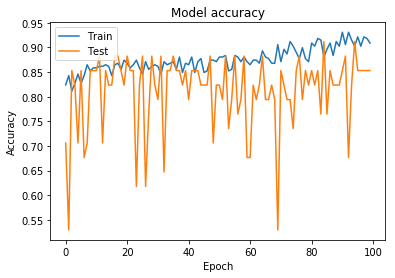

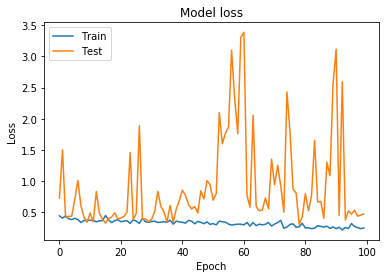

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()